DBSCAN using 3 PCA Components 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [57]:
feature_data = pd.read_csv("pca_3.csv")
feature_data = feature_data.drop("Unnamed: 0", axis=1)

print(feature_data)

scaler = StandardScaler()
scaler.fit(feature_data.to_numpy())
scaled_data = scaler.transform(feature_data.to_numpy())

# scaled_data = feature_data

              0         1         2
0     -1.607089  0.977637 -1.438565
1     -1.927880  1.913510 -0.355332
2     -1.535186 -0.575798 -1.292271
3     -2.295617 -0.109649  0.701057
4     -2.332972  1.013812 -0.639852
...         ...       ...       ...
48385 -1.298817  1.778724 -0.262809
48386 -0.645885  1.918875 -0.211133
48387  3.945842  0.205881  2.035792
48388 -0.463106  1.825685  0.406020
48389  2.194011 -0.141042 -1.265682

[48390 rows x 3 columns]


Determining Best EPS Value

Calcuating Distance to 5th Nearest Neighbor

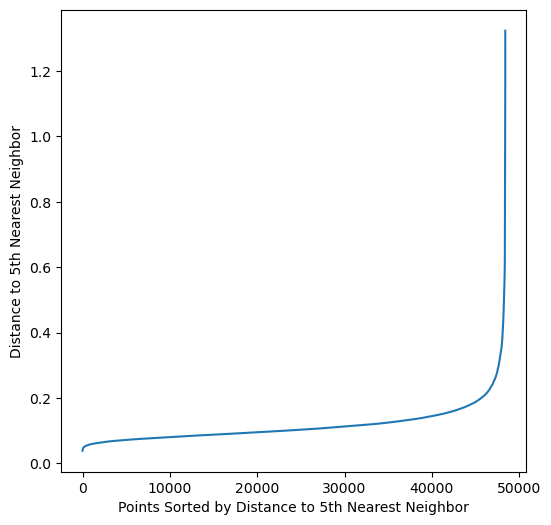

Elbow Distance: 0.37539630627059417


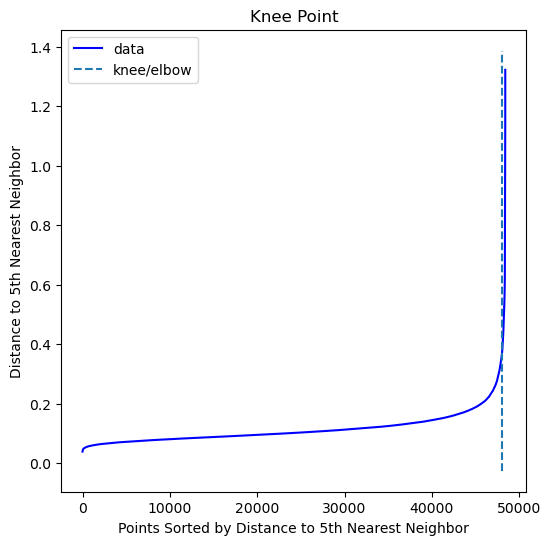

In [58]:
neighbors = NearestNeighbors(n_neighbors=6).fit(scaled_data)
distances, indices = neighbors.kneighbors(scaled_data)

# distances gives the array of distances from each point to its kth neighbor
# incices gives an array of the corresponding index of each point

# print(distances)
# print(indices)

distances = np.sort(distances[:,5], axis=0)
# only want to see distances to 5th nearest neighbor
# sort the points according to distance to 5th nearest neighbor

fig = plt.figure(figsize=(6, 6))
plt.plot(distances)
plt.xlabel("Points Sorted by Distance to 5th Nearest Neighbor")
plt.ylabel("Distance to 5th Nearest Neighbor")

plt.show()


kl = KneeLocator(np.arange(len(distances)), distances, curve="convex", direction="increasing")
kl.plot_knee()
plt.xlabel("Points Sorted by Distance to 5th Nearest Neighbor")
plt.ylabel("Distance to 5th Nearest Neighbor")

print("Elbow Distance: " + str(distances[kl.elbow]))

In [59]:
db = DBSCAN(min_samples=5, eps=0.375)
db.fit(scaled_data)

print(np.unique(db.labels_))


[-1  0  1  2]


In [60]:
# Clustering Evaluation

print("Labels:")
print(np.unique(db.labels_))
# -1 indicates outlier


db_index = davies_bouldin_score(scaled_data, db.labels_)
print("DB Index: " + str(db_index))

silhouette_coefficient = silhouette_score(scaled_data, db.labels_)
print("Silhouette Coefficient: " + str(silhouette_coefficient))

Labels:
[-1  0  1  2]
DB Index: 1.74514714213218
Silhouette Coefficient: 0.39750776852151753


Listing Tags/Labels

In [61]:
def parse_tags(tag):
    tag = tag.strip("[")
    tag = tag.strip("]")
    labels = []
    if ", " in tag: 
        for label in tag.split(", "):
            labels.append(label.strip("'"))
    else:
        labels = [tag.strip("'")]
    return labels

labeled_data = pd.read_csv("single_tags.csv")

In [62]:
tags_represented = {
    -1: {},
    0: {},
    1: {},
    2: {},
}

for i in np.unique(db.labels_):
    indices = np.where(db.labels_ == i)[0]
    for index in indices:
        for label in parse_tags(labeled_data._get_value(index, "seeds")):
            if  label not in tags_represented[i].keys():
                tags_represented[i].update({label: 1})
            else:
                tags_represented[i][label] += 1

print(tags_represented)

{-1: {'aggressive': 2, 'angry': 1, 'explosive': 1, 'fierce': 1, 'intense': 1, 'manic': 1, 'ominous': 4, 'dark': 1, 'eerie': 1, 'gloomy': 1, 'macabre': 2, 'scary': 4, 'spooky': 3, 'urgent': 1, 'bitter': 1, 'cold': 3, 'grim': 1, 'lonely': 1, 'nocturnal': 1, 'delicate': 5, 'dreamy': 1, 'gentle': 1, 'introspective': 1, 'lazy': 1, 'meditative': 3, 'relaxed': 2, 'soothing': 3, 'brash': 1, 'satirical': 1, 'wry': 1, 'dramatic': 2, 'eccentric': 1, 'epic': 2, 'mysterious': 3, 'mystical': 1, 'stylish': 1, 'theatrical': 2, 'comic': 1, 'fun': 1, 'humorous': 6, 'joyous': 2, 'playful': 4, 'positive': 2, 'silly': 7, 'witty': 1, 'earthy': 2, 'gritty': 1, 'organic': 1, 'warm': 1, 'erotic': 1, 'romantic': 3, 'cerebral': 1, 'clinical': 1, 'detached': 1, 'narrative': 3, 'serious': 2, 'nostalgic': 2, 'reflective': 1, 'slick': 2, 'strong': 1, 'triumphant': 1, 'child-like': 6, 'graceful': 1, 'optimistic': 1, 'poignant': 2, 'pure': 2, 'sacred': 5, 'tender': 1, 'whimsical': 4, 'atmospheric': 1, 'hypnotic': 2, '

In [63]:
cluster_zero = tags_represented[0]

cluster_zero = dict(sorted(cluster_zero.items(), key=lambda item: item[1]))

tags_1= np.array(list(cluster_zero.keys())).reshape(-1, 1)
occurrences_1 = np.array(list(cluster_zero.values())).reshape(-1, 1)


cluster_zero_occurrences = np.flip(np.hstack((tags_1, occurrences_1)), axis=0)

print(cluster_zero_occurrences)


[['sleazy' '725']
 ['sexy' '640']
 ['aggressive' '607']
 ['romantic' '605']
 ['erotic' '593']
 ['angry' '592']
 ['smooth' '591']
 ['epic' '582']
 ['lyrical' '573']
 ['light' '552']
 ['lush' '547']
 ['energetic' '540']
 ['lazy' '540']
 ['exotic' '536']
 ['positive' '535']
 ['spiritual' '518']
 ['cheerful' '515']
 ['uplifting' '512']
 ['gloomy' '512']
 ['fun' '510']
 ['happy' '501']
 ['warm' '495']
 ['sentimental' '493']
 ['nostalgic' '487']
 ['powerful' '484']
 ['hypnotic' '474']
 ['quiet' '471']
 ['relaxed' '470']
 ['sensual' '466']
 ['dark' '462']
 ['peaceful' '461']
 ['optimistic' '461']
 ['eerie' '460']
 ['mellow' '458']
 ['gritty' '451']
 ['technical' '449']
 ['mysterious' '447']
 ['gentle' '446']
 ['fierce' '446']
 ['dramatic' '445']
 ['lonely' '443']
 ['intense' '442']
 ['sweet' '441']
 ['bittersweet' '440']
 ['soothing' '440']
 ['spooky' '437']
 ['organic' '434']
 ['cold' '434']
 ['silly' '428']
 ['quirky' '421']
 ['calm' '416']
 ['soft' '413']
 ['atmospheric' '400']
 ['playful'

In [64]:
cluster_one = tags_represented[1]

cluster_one = dict(sorted(cluster_one.items(), key=lambda item: item[1]))

tags_1= np.array(list(cluster_one.keys())).reshape(-1, 1)
occurrences_1 = np.array(list(cluster_one.values())).reshape(-1, 1)


cluster_one_occurrences = np.flip(np.hstack((tags_1, occurrences_1)), axis=0)

print(cluster_one_occurrences)

[['comic' '2']
 ['thoughtful' '1']
 ['negative' '1']
 ['silly' '1']]


In [65]:
cluster_two = tags_represented[2]

cluster_two = dict(sorted(cluster_two.items(), key=lambda item: item[1]))

tags_2= np.array(list(cluster_two.keys())).reshape(-1, 1)
occurrences_2 = np.array(list(cluster_two.values())).reshape(-1, 1)


cluster_two_occurrences = np.flip(np.hstack((tags_2, occurrences_2)), axis=0)

print(cluster_two_occurrences)

[['child-like' '2']
 ['lyrical' '1']
 ['humorous' '1']
 ['comic' '1']]


In [66]:
outliers = tags_represented[-1]

outliers = dict(sorted(outliers.items(), key=lambda item: item[1]))

tags_0= np.array(list(outliers.keys())).reshape(-1, 1)
occurrences_0 = np.array(list(outliers.values())).reshape(-1, 1)

outliers_occurrences = np.flip(np.hstack((tags_0, occurrences_0)), axis=0)

print(outliers_occurrences)
print(outliers)

[['silly' '7']
 ['child-like' '6']
 ['humorous' '6']
 ['sacred' '5']
 ['delicate' '5']
 ['whimsical' '4']
 ['playful' '4']
 ['scary' '4']
 ['ominous' '4']
 ['narrative' '3']
 ['romantic' '3']
 ['mysterious' '3']
 ['soothing' '3']
 ['meditative' '3']
 ['cold' '3']
 ['spooky' '3']
 ['quiet' '2']
 ['hypnotic' '2']
 ['pure' '2']
 ['poignant' '2']
 ['slick' '2']
 ['nostalgic' '2']
 ['serious' '2']
 ['earthy' '2']
 ['positive' '2']
 ['joyous' '2']
 ['theatrical' '2']
 ['epic' '2']
 ['dramatic' '2']
 ['relaxed' '2']
 ['macabre' '2']
 ['aggressive' '2']
 ['cynical' '1']
 ['mellow' '1']
 ['peaceful' '1']
 ['calm' '1']
 ['tense' '1']
 ['rousing' '1']
 ['raucous' '1']
 ['trippy' '1']
 ['messy' '1']
 ['atmospheric' '1']
 ['tender' '1']
 ['optimistic' '1']
 ['graceful' '1']
 ['triumphant' '1']
 ['strong' '1']
 ['reflective' '1']
 ['detached' '1']
 ['clinical' '1']
 ['cerebral' '1']
 ['erotic' '1']
 ['warm' '1']
 ['organic' '1']
 ['gritty' '1']
 ['witty' '1']
 ['fun' '1']
 ['comic' '1']
 ['stylish' 

In [67]:
dbscan_pca3 = pd.read_csv("single_tags.csv")
dbscan_pca3 = dbscan_pca3.drop("Unnamed: 0", axis=1)

print(dbscan_pca3.shape)
dbscan_pca3.insert(len(dbscan_pca3.columns), "Labels", db.labels_, True)

print(dbscan_pca3.shape)

dbscan_pca3.to_csv("dbscan_pca3.csv")

(48390, 22)
(48390, 23)


Visualization

In [68]:
array_of_features = pd.read_csv("dbscan_pca3.csv")
array_of_features = array_of_features.drop("Unnamed: 0", axis=1)


pca_feat = pd.read_csv("pca_3.csv")
pca_feat = pca_feat.drop("Unnamed: 0", axis=1)

feature_data = pd.read_csv("relevant_features_single_tags.csv")
feature_data["loudness"] *= -1
for column in feature_data.keys():
    feature_data[column] = feature_data[column] /feature_data[column].abs().max()
array_of_standardized_features = feature_data

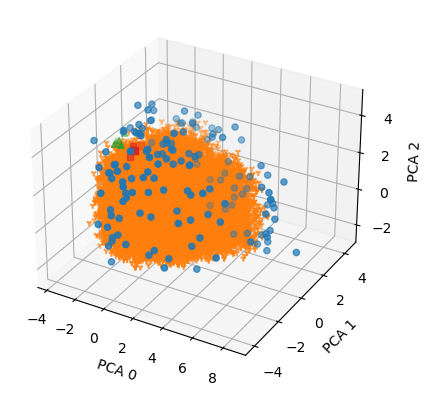

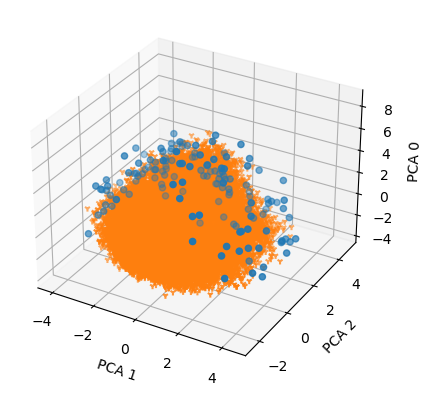

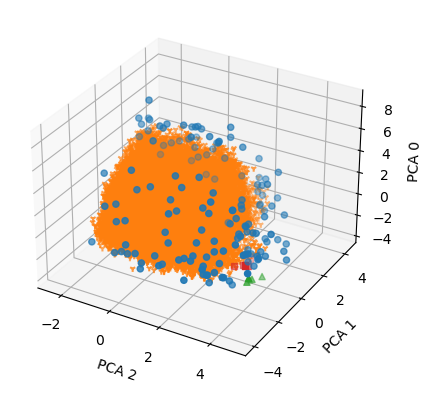

In [69]:
outliers = pca_feat[array_of_features["Labels"] == -1]
cluster_zero = pca_feat[array_of_features["Labels"] == 0]
cluster_one = pca_feat[array_of_features["Labels"] == 1]
cluster_two = pca_feat[array_of_features["Labels"] == 2]
cluster_three = pca_feat[array_of_features["Labels"] == 3]
cluster_four = pca_feat[array_of_features["Labels"] == 4]


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for cluster, m in [(outliers, 'o'), (cluster_zero,'1'), (cluster_one,'^'), (cluster_two,'s'), (cluster_three,'x'), (cluster_four, 'D')]:
    xs = cluster['0']
    ys = cluster['1']
    zs = cluster['2']
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for cluster, m in [(outliers, 'o'), (cluster_zero,'1'), (cluster_one,'^'), (cluster_two,'s'), (cluster_three,'x'), (cluster_four, 'D')]:
    xs = cluster['1']
    ys = cluster['2']
    zs = cluster['0']
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 0')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for cluster, m in [(outliers, 'o'), (cluster_zero,'1'), (cluster_one,'^'), (cluster_two,'s'), (cluster_three,'x'), (cluster_four, 'D')]:
    xs = cluster['2']
    ys = cluster['1']
    zs = cluster['0']
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('PCA 2')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 0')
plt.show()
